In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pmdarima

In [199]:
!pip install pmdarima

    100% |████████████████████████████████| 1.5MB 437kB/s eta 0:00:01
    100% |████████████████████████████████| 8.7MB 102kB/s eta 0:00:01
    100% |████████████████████████████████| 26.1MB 31kB/s  eta 0:00:01
    100% |████████████████████████████████| 7.1MB 154kB/s eta 0:00:01    13% |████▏                           | 921kB 29.6MB/s eta 0:00:01
    100% |████████████████████████████████| 20.2MB 51kB/s  eta 0:00:01
  Found existing installation: numpy 1.16.0
    Uninstalling numpy-1.16.0:
      Successfully uninstalled numpy-1.16.0
  Found existing installation: scipy 1.2.0
    Uninstalling scipy-1.2.0:
      Successfully uninstalled scipy-1.2.0
  Found existing installation: statsmodels 0.8.0
    Uninstalling statsmodels-0.8.0:
      Successfully uninstalled statsmodels-0.8.0
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
You are using pip version 9.0.3, however version 20.0.2 is available.


In [202]:
pip install --upgrade pip

    100% |████████████████████████████████| 1.4MB 587kB/s eta 0:00:01
  Found existing installation: pip 9.0.3
    Uninstalling pip-9.0.3:
      Successfully uninstalled pip-9.0.3
Note: you may need to restart the kernel to use updated packages.


# Redfin Data #

In [2]:
sf_median_prices = pd.read_csv("SF_Refin_RealEstate_Full.csv")

/srv/app/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sf_median_prices

,City,last_updated,Measure Display,parent_metro_region,Period Begin,Period End,Property Type,Region,Region Type,Seasonally Adjusted,...,pending_sales_yoy,Period Duration,Price Drops,Price Drops Mom,Price Drops Yoy,property_type_id,region_type_id,Sold Above List,Sold Above List Mom,Sold Above List Yoy
0,San Francisco,4/5/2020 14:45,NaN,"San Francisco, CA",1/1/2012,3/31/2012,All Residential,"San Francisco, CA - Southwest San Francisco",Neighborhood,False,...,0.123596,90,NaN,NaN,NaN,-1,1,0.414286,0.050000,0.039568
1,San Francisco,4/5/2020 14:45,NaN,"San Francisco, CA",2/1/2012,4/30/2012,All Residential,"San Francisco, CA - Bernal Heights",Neighborhood,False,...,-0.275862,90,NaN,NaN,NaN,-1,1,0.418182,0.097427,0.006417
2,San Francisco,4/5/2020 14:45,NaN,"San Francisco, CA",2/1/2012,4/30/2012,All Residential,"San Francisco, CA - Excelsior",Neighborhood,False,...,0.000000,90,NaN,NaN,NaN,-1,1,0.428571,-0.045113,0.011905
3,San Francisco,4/5/2020 14:45,NaN,"San Francisco, CA",3/1/2012,5/31/2012,All Residential,"San Francisco, CA - Corona Heights",Neighborhood,False,...,3.000000,90,NaN,NaN,NaN,-1,1,0.666667,-0.133333,0.128205
4,San Francisco,4/5/2020 14:45,NaN,"San Francisco, CA",7/1/2012,9/30/2012,All Residential,"San Francisco, CA - Outer Richmond",Neighborhood,False,...,1.000000,90,NaN,NaN,NaN,-1,1,0.472222,-0.037982,0.157937
5,San Francisco,4/5/2020 14:45,NaN,"San Francisco, CA",9/1/2012,11/30/2012,All Residential,"San Francisco, CA - Marina District",Neighborhood,False,...,-0.125000,90,NaN,NaN,NaN,-1,1,0.625000,-0.041667,0.275000
6,San Francisco,4/5/2020 14:45,NaN,"San Francisco, CA",10/1/2012,12/31/2012,All Residential,"San Francisco, CA - Silver Terrace",Neighborhood,False,...,0.142857,90,NaN,NaN,NaN,-1,1,0.642857,0.087302,0.202857
7,San Francisco,4/5/2020 14:45,NaN,"San Francisco, CA",1/1/2013,3/31/2013,All Residential,"San Francisco, CA - Nob Hill",Neighborhood,False,...,-0.461538,90,NaN,NaN,NaN,-1,1,0.533333,0.055072,0.220833
8,San Francisco,4/5/2020 14:45,NaN,"San Francisco, CA",2/1/2013,4/30/2013,All Residential,"San Francisco, CA - Marina District",Neighborhood,False,...,8.000000,90,NaN,NaN,NaN,-1,1,0.606061,0.034632,0.320346
9,San Francisco,4/5/2020 14:45,NaN,"San Francisco, CA",5/1/2013,7/31/2013,All Residential,"San Francisco, CA - Crocker Amazon",Neighborhood,False,...,0.666667,90,NaN,NaN,NaN,-1,1,0.611111,-0.111111,0.166667


In [4]:
sf_median_prices.columns

Index(['City', 'last_updated', 'Measure Display', 'parent_metro_region',
       'Period Begin', 'Period End', 'Property Type', 'Region', 'Region Type',
       'Seasonally Adjusted', 'State', 'State Code', 'Table Id',
       'Worksheet Filter', 'active_listings', 'active_listings_mom',
       'active_listings_yoy', 'Avg Sale To List', 'Avg Sale To List Mom',
       'Avg Sale To List Yoy', 'Homes Sold', 'Homes Sold Mom',
       'Homes Sold Yoy', 'Inventory', 'Inventory Mom', 'Inventory Yoy',
       'Median Dom', 'Median Dom Mom', 'Median Dom Yoy', 'Median List Ppsf',
       'Median List Ppsf Mom', 'Median List Ppsf Yoy', 'Median List Price',
       'Median List Price Mom', 'Median List Price Yoy', 'Median Ppsf',
       'Median Ppsf Mom', 'Median Ppsf Yoy', 'Median Sale Price',
       'Median Sale Price Mom', 'Median Sale Price Yoy', 'months_of_supply',
       'months_of_supply_mom', 'months_of_supply_yoy', 'New Listings',
       'New Listings Mom', 'New Listings Yoy', 'Number of Records'

# Zillow Data #

In [5]:
zillow = pd.read_csv("Neighborhood_Zhvi_AllHomes (1).csv")

In [6]:
zillow[zillow['City'] == 'San Francisco'].head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
178,268384,Outer Sunset,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,179,276879.0,276122.0,275404.0,...,1339632,1336020,1339738,1340683,1350764,1361726,1375165,1394282,1405831,1420677
256,274552,Mission,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,257,250653.0,249746.0,247990.0,...,1512071,1513176,1509715,1497830,1495209,1501976,1513273,1524685,1529952,1532762
388,268383,Outer Richmond,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,389,343665.0,342739.0,342372.0,...,1488611,1484391,1490775,1493178,1507039,1517135,1532410,1551587,1567902,1593246
464,268219,Inner Richmond,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,465,420393.0,421036.0,420721.0,...,2135643,2142091,2137434,2123758,2115615,2117486,2119419,2135166,2149286,2165077
518,268396,Parkside,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,519,288147.0,286827.0,286175.0,...,1353593,1351530,1356621,1359817,1368281,1378804,1392307,1412003,1427431,1447909


In [7]:
sf_zillow = zillow[zillow['City'] == 'San Francisco'].drop(['RegionID', 'State', 'Metro', 'CountyName', 'City', 'SizeRank'], axis=1).set_index('RegionName')

In [8]:
sf_zillow1 = sf_zillow.transpose()

In [9]:
sf_zillow1.head()

RegionName,Outer Sunset,Mission,Outer Richmond,Inner Richmond,Parkside,South of Market,Excelsior,Pacific Heights,Tenderloin,Bernal Heights,...,Little Hollywood,North Waterfront,Forest Knolls,Seacliff,St. Francis Wood,Mount Davidson Manor,Balboa Terrace,Monterey Heights,Presidio,Westwood Highlands
1996-04,276879.0,250653.0,343665.0,420393.0,288147.0,259141.0,204541.0,462862.0,209255.0,287907.0,...,307826.0,519574.0,406304.0,656471.0,575304.0,340124.0,469678.0,485580.0,NaN,350467.0
1996-05,276122.0,249746.0,342739.0,421036.0,286827.0,258880.0,203467.0,463517.0,207186.0,286546.0,...,309001.0,516409.0,407569.0,663546.0,579582.0,338895.0,472044.0,486898.0,NaN,350763.0
1996-06,275404.0,247990.0,342372.0,420721.0,286175.0,258834.0,202897.0,463468.0,206675.0,285791.0,...,309758.0,511185.0,408218.0,672859.0,585996.0,339071.0,474955.0,490672.0,NaN,351902.0
1996-07,274729.0,246172.0,342720.0,419260.0,285834.0,259466.0,202671.0,464122.0,204832.0,285385.0,...,311076.0,509049.0,409575.0,681062.0,593329.0,339969.0,476253.0,495913.0,NaN,353134.0
1996-08,274910.0,247222.0,343473.0,419768.0,286503.0,260976.0,203318.0,464295.0,204095.0,286015.0,...,311467.0,507926.0,411514.0,691417.0,602065.0,340554.0,478571.0,499527.0,NaN,354847.0


In [10]:
sf_zillow1.index = pd.to_datetime(sf_zillow1.index)

In [11]:
sf_zillow1.tail()

RegionName,Outer Sunset,Mission,Outer Richmond,Inner Richmond,Parkside,South of Market,Excelsior,Pacific Heights,Tenderloin,Bernal Heights,...,Little Hollywood,North Waterfront,Forest Knolls,Seacliff,St. Francis Wood,Mount Davidson Manor,Balboa Terrace,Monterey Heights,Presidio,Westwood Highlands
2019-10-01,1361726.0,1501976.0,1517135.0,2117486.0,1378804.0,1032148.0,1093746.0,2000159.0,752329.0,1533513.0,...,972213.0,1410776.0,1603280.0,4050811.0,2970016.0,1577979.0,1993971.0,2381568.0,2207585.0,1672412.0
2019-11-01,1375165.0,1513273.0,1532410.0,2119419.0,1392307.0,1041237.0,1101460.0,2013844.0,758629.0,1547090.0,...,974363.0,1417367.0,1620743.0,4087286.0,3031590.0,1587779.0,2014021.0,2421310.0,2268839.0,1684149.0
2019-12-01,1394282.0,1524685.0,1551587.0,2135166.0,1412003.0,1054421.0,1112064.0,2035318.0,768808.0,1559945.0,...,977329.0,1424572.0,1640467.0,4137127.0,3091927.0,1613502.0,2045023.0,2466752.0,2334675.0,1708485.0
2020-01-01,1405831.0,1529952.0,1567902.0,2149286.0,1427431.0,1061675.0,1124264.0,2043853.0,774325.0,1571274.0,...,973106.0,1427221.0,1655223.0,4169224.0,3148196.0,1632301.0,2071086.0,2501457.0,2425827.0,1726617.0
2020-02-01,1420677.0,1532762.0,1593246.0,2165077.0,1447909.0,1072135.0,1143595.0,2048524.0,785779.0,1580388.0,...,962408.0,1430366.0,1674742.0,4188476.0,3203698.0,1661187.0,2101976.0,2533291.0,2550677.0,1755223.0


In [12]:
len(sf_zillow1)

287

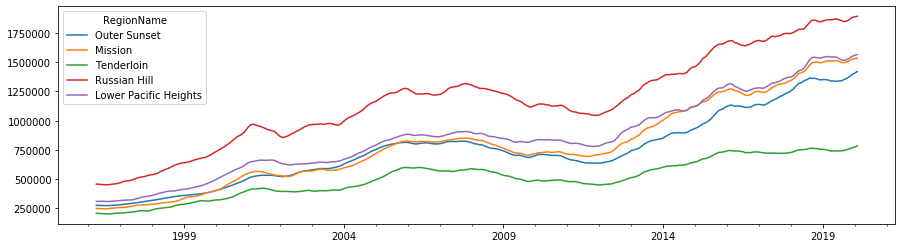

In [13]:
sf_zillow1[['Outer Sunset', 'Mission', 'Tenderloin', 'Russian Hill', 'Lower Pacific Heights']].plot(figsize=(15,4))


### above we can see the price trends for 5 of the SF neighborhoods we are looking at. We can tell that median house prices are generally increasing for all the neighborhoods, but it is hard to tell if there are any seasonality or other effects based solely on this plot ###

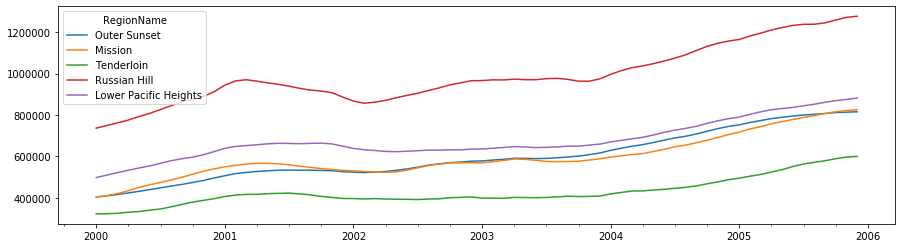

In [14]:
sf_zillow1.loc['2000-01-01':'2005-12-01', ['Outer Sunset', 'Mission', 'Tenderloin', 'Russian Hill', 'Lower Pacific Heights']].plot(figsize=(15,4))

### based on the data visualization from 2000-2006 it doesn't seem to me like there is much seasonality with housing prices ###

## Maybe a good idea to do a mathematical proof of seasonality test --> can look this up ##

## Also look into some other time series data analysis --> resampling, periodicity and correlation, splitting and stacking cycles ##

## references:
https://ourcodingclub.github.io/tutorials/pandas-time-series/

https://medium.com/@feraguilari/time-series-analysis-modfinalproyect-b9fb23c28309


# Algorithm #

In [15]:
## We are going to use the Seasonal Auto-Regressive Integrated Moving Average (SARIMA) method to calulate future values.

## The SARIMA method requires that the data be stationary. In other words, it can't be increasing over time on average like 
## our data is doing.

## To account for this we can calculate the returns for each month and check to see if those are stationary.

In [16]:
sf_zillow.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
RegionName,,,,,,,,,,,,,,,,,,,,,
Outer Sunset,276879.0,276122.0,275404.0,274729.0,274910.0,275409.0,276754.0,278100.0,280026.0,282068.0,...,1339632,1336020,1339738,1340683,1350764,1361726,1375165,1394282,1405831,1420677
Mission,250653.0,249746.0,247990.0,246172.0,247222.0,249920.0,252761.0,254255.0,255210.0,256477.0,...,1512071,1513176,1509715,1497830,1495209,1501976,1513273,1524685,1529952,1532762
Outer Richmond,343665.0,342739.0,342372.0,342720.0,343473.0,344083.0,345793.0,347735.0,349681.0,351865.0,...,1488611,1484391,1490775,1493178,1507039,1517135,1532410,1551587,1567902,1593246
Inner Richmond,420393.0,421036.0,420721.0,419260.0,419768.0,421887.0,426701.0,430951.0,435676.0,439446.0,...,2135643,2142091,2137434,2123758,2115615,2117486,2119419,2135166,2149286,2165077
Parkside,288147.0,286827.0,286175.0,285834.0,286503.0,287603.0,289335.0,291334.0,293467.0,296076.0,...,1353593,1351530,1356621,1359817,1368281,1378804,1392307,1412003,1427431,1447909


In [17]:
sf_zillow1.head()

RegionName,Outer Sunset,Mission,Outer Richmond,Inner Richmond,Parkside,South of Market,Excelsior,Pacific Heights,Tenderloin,Bernal Heights,...,Little Hollywood,North Waterfront,Forest Knolls,Seacliff,St. Francis Wood,Mount Davidson Manor,Balboa Terrace,Monterey Heights,Presidio,Westwood Highlands
1996-04-01,276879.0,250653.0,343665.0,420393.0,288147.0,259141.0,204541.0,462862.0,209255.0,287907.0,...,307826.0,519574.0,406304.0,656471.0,575304.0,340124.0,469678.0,485580.0,NaN,350467.0
1996-05-01,276122.0,249746.0,342739.0,421036.0,286827.0,258880.0,203467.0,463517.0,207186.0,286546.0,...,309001.0,516409.0,407569.0,663546.0,579582.0,338895.0,472044.0,486898.0,NaN,350763.0
1996-06-01,275404.0,247990.0,342372.0,420721.0,286175.0,258834.0,202897.0,463468.0,206675.0,285791.0,...,309758.0,511185.0,408218.0,672859.0,585996.0,339071.0,474955.0,490672.0,NaN,351902.0
1996-07-01,274729.0,246172.0,342720.0,419260.0,285834.0,259466.0,202671.0,464122.0,204832.0,285385.0,...,311076.0,509049.0,409575.0,681062.0,593329.0,339969.0,476253.0,495913.0,NaN,353134.0
1996-08-01,274910.0,247222.0,343473.0,419768.0,286503.0,260976.0,203318.0,464295.0,204095.0,286015.0,...,311467.0,507926.0,411514.0,691417.0,602065.0,340554.0,478571.0,499527.0,NaN,354847.0


### Trial run with Outer Sunset ###

#### We will generalize after ####

In [18]:

trial = sf_zillow1[['Outer Sunset']]
trial = trial.reset_index()
#trial['returns'] = [(trial.loc[i, 'Outer Sunset'] - trial.loc[i-1, 'Outer Sunset']) / trial.loc[i, 'Outer Sunset'] for i in trial.index]

In [19]:
trial.head()

RegionName,index,Outer Sunset
0,1996-04-01,276879.0
1,1996-05-01,276122.0
2,1996-06-01,275404.0
3,1996-07-01,274729.0
4,1996-08-01,274910.0


In [20]:
returns = [0] + ([(trial.loc[i, 'Outer Sunset'] - trial.loc[i-1, 'Outer Sunset']) / trial.loc[i, 'Outer Sunset'] for i in range(1,len(trial))])

In [21]:
len(returns)

287

In [22]:
len(trial)

287

In [23]:
trial['returns'] = returns

In [36]:
trial.tail()

RegionName,index,Outer Sunset,returns
282,2019-10-01,1361726.0,0.008050
283,2019-11-01,1375165.0,0.009773
284,2019-12-01,1394282.0,0.013711
285,2020-01-01,1405831.0,0.008215
286,2020-02-01,1420677.0,0.010450


0.005644502558088015


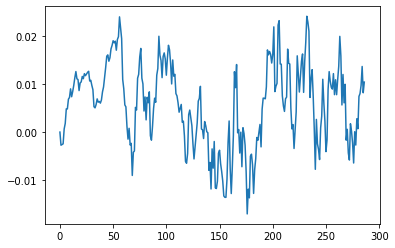

In [25]:
trial['returns'].plot()
print( np.mean(trial['returns']))

In [26]:
## It looks like the returns are stationary with no particular pattern of increasing or decreasing. Mean is close to 0
## We can perform the SARIMA method on returns
## The full justification requires looking at p-values (will do this later) --> Augmented Dickey-Fuller Test

In [27]:
#split into train and test sets
#preprocessing (since arima takes univariate series as input)
train_trial = trial[:int(0.7*(len(trial)))].drop(['index', 'Outer Sunset'], axis = 1)
test_trial = trial[int(0.7*(len(trial))):].drop(['index', 'Outer Sunset'], axis = 1)


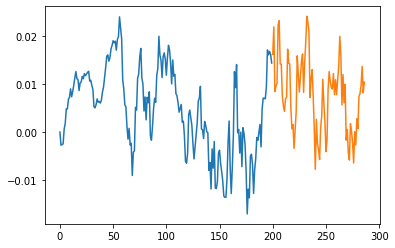

In [28]:
train_trial['returns'].plot()
test_trial['returns'].plot()

In [34]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train_trial, trace=True, error_action='ignore', suppress_warnings=True)
model_fit = model.fit(train_trial)

forecast = model_fit.predict(n_periods=len(test_trial))
forecast = pd.DataFrame(forecast,index = test_trial.index,columns=['Prediction'])


Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-1692.456, BIC=-1672.696, Time=0.687 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-1641.284, BIC=-1634.698, Time=0.064 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-1641.036, BIC=-1631.156, Time=0.106 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-1638.386, BIC=-1628.506, Time=0.060 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=-1643.215, BIC=-1639.921, Time=0.033 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-1695.561, BIC=-1679.095, Time=0.617 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-1650.344, BIC=-1637.171, Time=0.322 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-1637.284, BIC=-1624.110, Time=0.068 seconds
Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=-1723.607, BIC=-1703.847, Time=0.596 seconds
Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=-

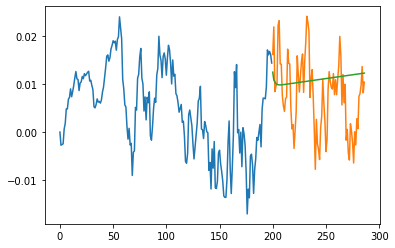

In [35]:
##Plot predictions for test set
plt.plot(train_trial, label='Train')
plt.plot(test_trial, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [32]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test_trial,forecast))
print(rms)

0.008459342028796276


In [39]:
len(test_trial) + (10*12)

207

In [53]:
train_trial.tail()

RegionName,returns
195,0.017173
196,0.016138
197,0.016841
198,0.016235
199,0.014430


In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [56]:
#making predictions
model_full = SARIMAX(train_trial, order=(1,0,1))
model_full_fit = model_full.fit()

output = model_full_fit.get_prediction(start=199, end = 207, dynamic = True)
forecast_ci = output.conf_int()

year_1= (1+output.predicted_mean[87:99]).prod()-1
year_3=(1+output.predicted_mean[99:135]).prod()-1
year_5= (1+output.predicted_mean[135:195]).prod()-1
year_10=(1+output.predicted_mean[87:]).prod()-1

#yr10_forecast = model_fit.predict(n_periods = 207)
#yr10_forecast = pd.DataFrame(yr10_forecast,index = test_trial.index,columns=['Prediction'])

In [42]:
len(yr10_forecast)

87

In [164]:
for nhood in sf_zillow1.columns:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-164-6f47ee9879e2>, line 2)